In [1]:
import numpy as np
from numpy import array, newaxis, expand_dims
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf as pdflib
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

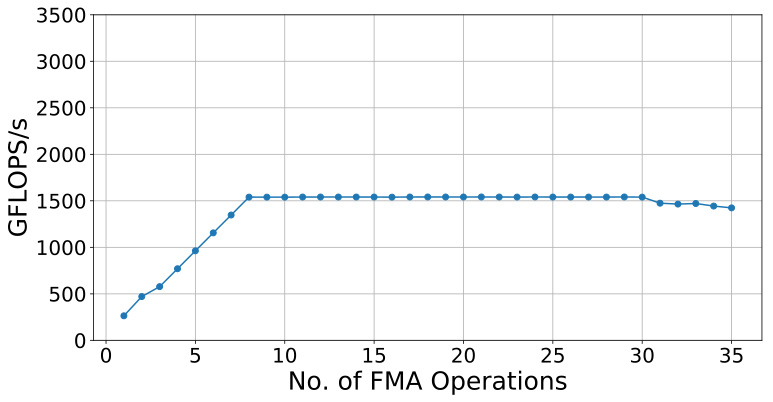

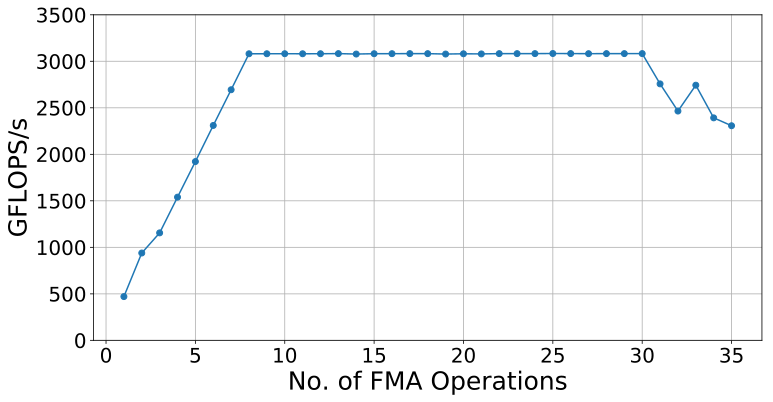

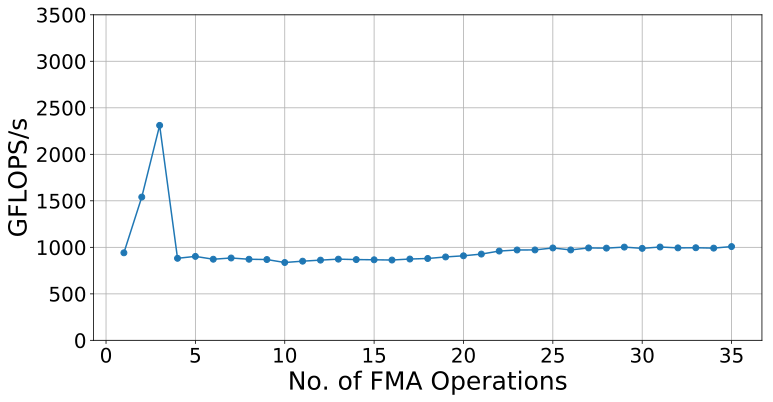

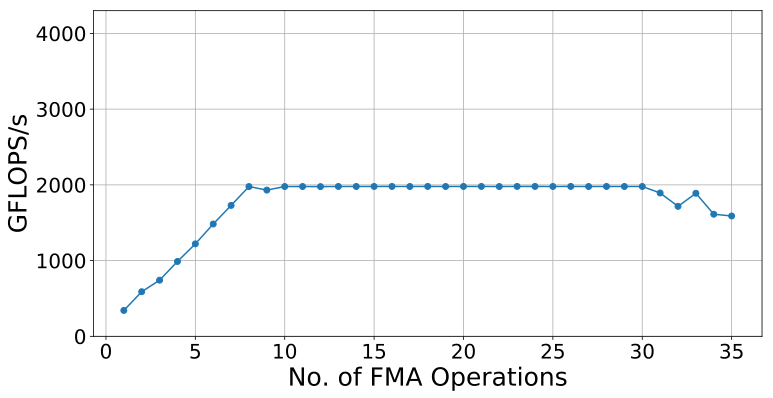

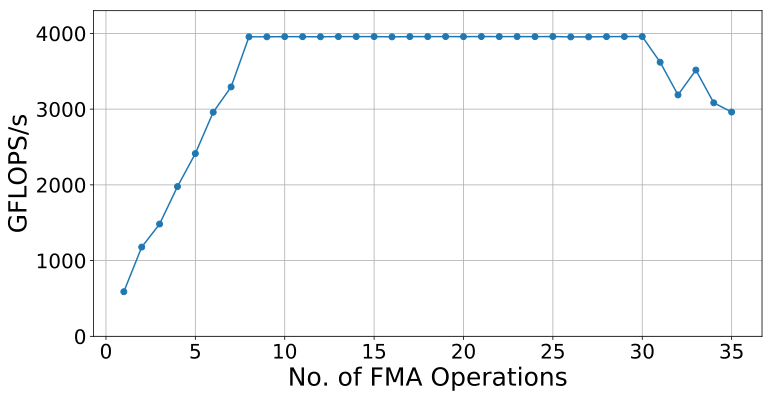

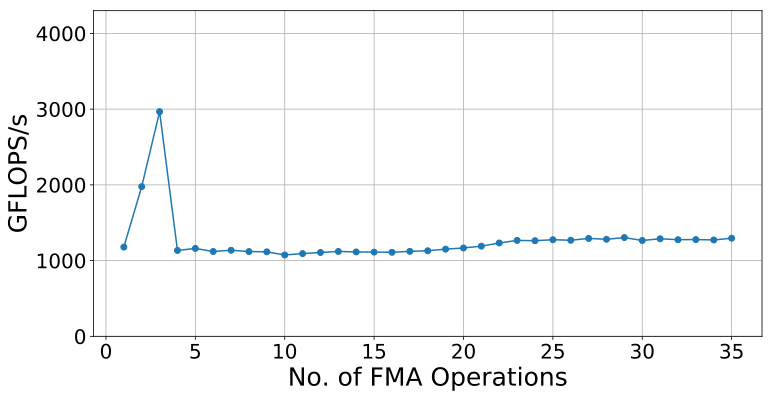

In [2]:
fmaRes = pd.read_csv("omp/Results/FMA_ON_SKYLAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()

for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("paper/figures/skylake_omp_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig1,ax1 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", ax=ax1, style="-o", x="ChainedFMAs", legend=False, y="GFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,3500)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel("GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
#     ax.set_title("Skylake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig1, bbox_inches = 'tight')
    pdf.close()

fmaRes = pd.read_csv("omp/Results/FMA_ON_CASCADE_LAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("paper/figures/cascade_lake_omp_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig2,ax2 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax2, x="ChainedFMAs", legend=False, y="GFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,4300)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel("GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
#     ax.set_title("Cascade Lake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    
    pdf.savefig(fig2, bbox_inches = 'tight')
    pdf.close()
    

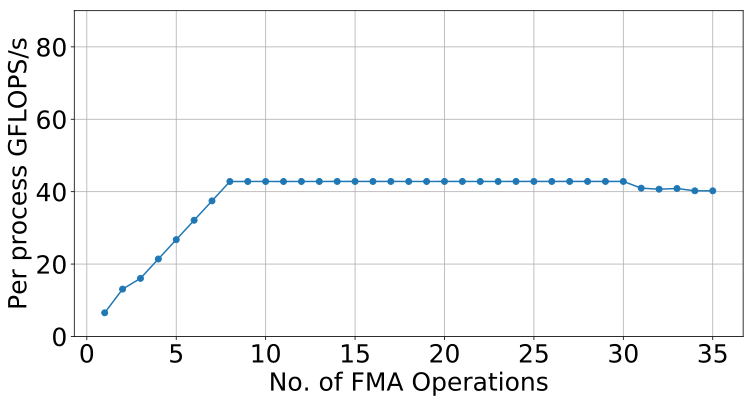

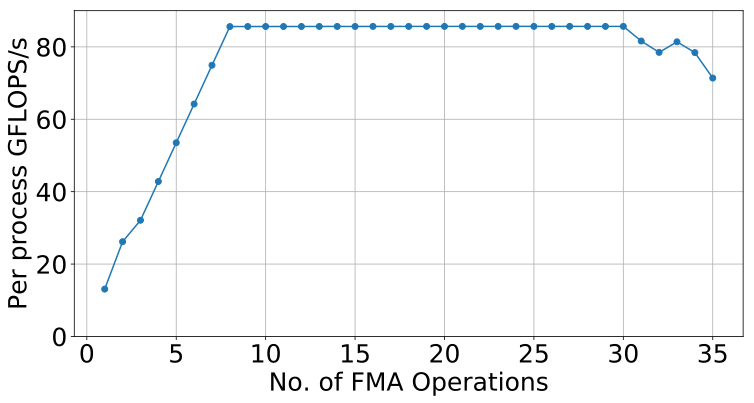

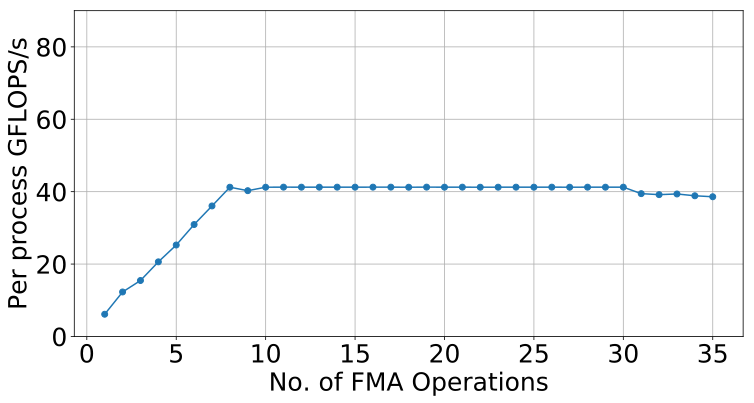

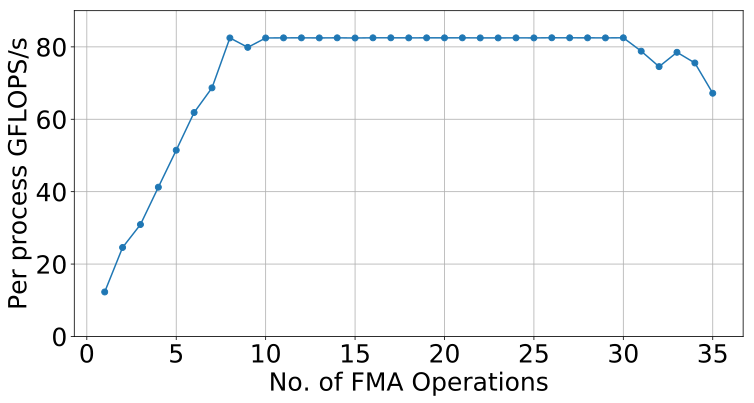

In [3]:
fmaRes = pd.read_csv("mpi/Results/FMA_ON_SKYLAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("paper/figures/skylake_mpi_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig1,ax1 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax1, x="ChainedFMAs", legend=False, y="AvgGFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,90)
    ax.set_ylabel("Per process GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
#     ax.set_title("Skylake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig1, bbox_inches = 'tight')
    pdf.close()
    
fmaRes = pd.read_csv("mpi/Results/FMA_ON_CASCADE_LAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("paper/figures/cascade_lake_mpi_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig2,ax2 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax2, x="ChainedFMAs", legend=False, y="AvgGFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,90)
    ax.set_ylabel("Per process GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
#     ax.set_title("Cascade Lake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig2, bbox_inches = 'tight')
    pdf.close()
    
    

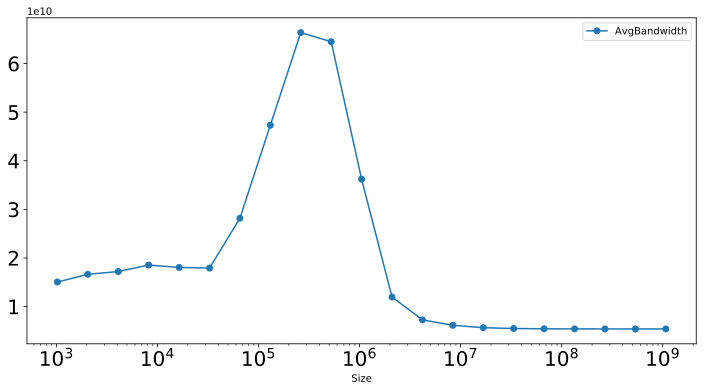

In [4]:
seq_bandwidth = pd.read_csv("mpi/Results/SEQ_READ_ON_SKYLAKE.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()
seq_bandwidth.plot(kind="line", x="Size", y="AvgBandwidth", figsize=(12,6), fontsize=20, style="-o", logx=True)

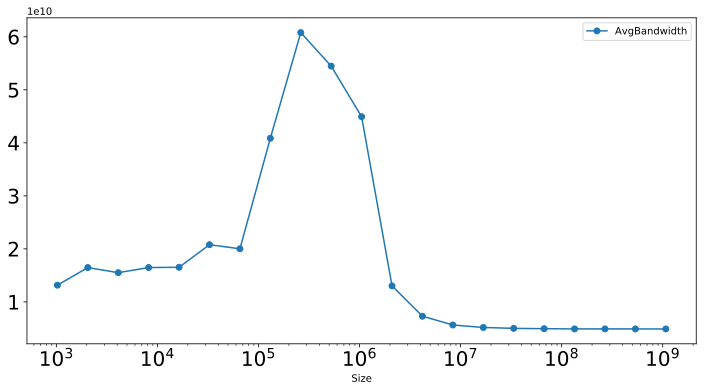

In [5]:
seq_bandwidth = pd.read_csv("mpi/Results/SEQ_READ_ON_CASCADE_LAKE.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()
seq_bandwidth.plot(kind="line", x="Size", y="AvgBandwidth", figsize=(12,6), fontsize=20, style="-o", logx=True)

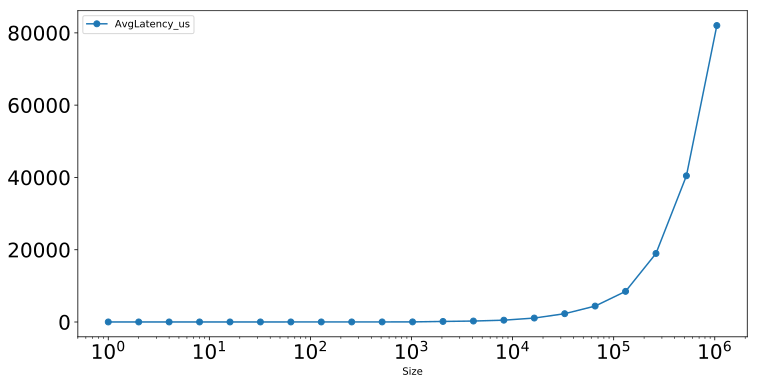

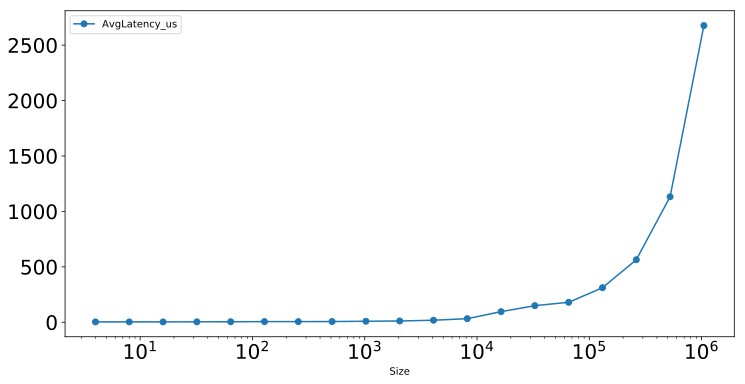

In [10]:
seq_bandwidth = pd.read_csv("mpi/Results/cascade_allgatherv.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()
ax = seq_bandwidth.plot(kind="line", x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)

seq_bandwidth = pd.read_csv("mpi/Results/cascade_allreduce.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()
ax = seq_bandwidth.plot(kind="line", x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
